# Review Sentiment Anaylsis

## Libraries

In [98]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.pyplot import figure

import matplotlib.pyplot as plt
%matplotlib inline

## Data

In [6]:
df = pd.read_csv('../Data/sentiment-analysis-dataset-google-play-app-reviews.csv')

In [7]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOHNHm4OfbjkxEXXa51JwZEHAaDlvfSgN0OU256...,Lex S,https://lh3.googleusercontent.com/-FgDpDeEJLAw...,"I love this app, but I do have one major gripe...",1,3,5.2.0.23,2020-08-05 16:22:04,Any.do is not only a product but also a servic...,2020-08-05 08:02:08,most_relevant,com.anydo
1,gp:AOqpTOEujjLj56XVqumAkipImEqIAU3qTIuQjENPaOK...,Sam van Dijk,https://lh3.googleusercontent.com/-pO3wTIb4myA...,"Trash. Yes, it has some nice nifty features bu...",1,25,5.2.0.23,2020-07-21 22:17:25,"Premium users can edit, create and delete tags...",2020-07-23 15:57:51,most_relevant,com.anydo
2,gp:AOqpTOElISilniODwd6UBrqFngzTtDHLF-G0VLpR2_y...,Hugo Bounoua,https://lh3.googleusercontent.com/a-/AOh14GgxG...,"OMG the UI is awful, seriously you have popup ...",1,8,5.2.0.23,2020-07-22 07:23:35,The Premium ad only shows up when first openin...,2020-07-23 16:20:43,most_relevant,com.anydo
3,gp:AOqpTOEkZ75JR5CzVhxoxWa0XVmPanw_pEl1srcJ7yv...,Aishwarya Mishra,https://lh3.googleusercontent.com/a-/AOh14Ghhq...,I've been using the app for a while and since ...,1,20,5.2.0.23,2020-07-19 06:49:15,"Hi, due to new restrictions from Google, the p...",2020-07-22 14:05:56,most_relevant,com.anydo
4,gp:AOqpTOEtpLcODD_NZOBqR1N7DBbaLdw3Gyz3v3xZAp1...,Mad Scientist,https://lh3.googleusercontent.com/-kIZF4kMt6yY...,"Unable to register with an email. Clicking""con...",1,77,5.2.0.9,2020-07-10 17:59:22,We are unaware of any issues with signing in t...,2020-07-12 08:02:19,most_relevant,com.anydo


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16092 entries, 0 to 16091
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              16092 non-null  object
 1   userName              16092 non-null  object
 2   userImage             16092 non-null  object
 3   content               16092 non-null  object
 4   score                 16092 non-null  int64 
 5   thumbsUpCount         16092 non-null  int64 
 6   reviewCreatedVersion  13742 non-null  object
 7   at                    16092 non-null  object
 8   replyContent          7889 non-null   object
 9   repliedAt             7889 non-null   object
 10  sortOrder             16092 non-null  object
 11  appId                 16092 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.5+ MB


In [9]:
df['appId'].unique()

array(['com.anydo', 'com.todoist', 'com.ticktick.task',
       'com.habitrpg.android.habitica', 'cc.forestapp',
       'com.oristats.habitbull', 'com.levor.liferpgtasks', 'com.habitnow',
       'com.microsoft.todos', 'prox.lab.calclock',
       'com.gmail.jmartindev.timetune', 'com.artfulagenda.app',
       'com.tasks.android', 'com.appgenix.bizcal', 'com.appxy.planner'],
      dtype=object)

In [10]:
df['appId'].value_counts() # microsoft.todos?

cc.forestapp                     1200
com.microsoft.todos              1200
com.gmail.jmartindev.timetune    1200
com.oristats.habitbull           1200
com.appxy.planner                1200
prox.lab.calclock                1200
com.appgenix.bizcal              1200
com.anydo                        1200
com.ticktick.task                1200
com.todoist                      1200
com.habitrpg.android.habitica    1200
com.tasks.android                1200
com.levor.liferpgtasks            810
com.habitnow                      620
com.artfulagenda.app              262
Name: appId, dtype: int64

In [11]:
df['score'].unique()

array([1, 2, 3, 4, 5])

## Choosing microsoft_todos

In [12]:
microsoft_todos = df[df['appId'] == 'com.microsoft.todos']

In [20]:
microsoft_todos = microsoft_todos.reset_index()

In [13]:
microsoft_todos.shape

(1200, 12)

In [15]:
microsoft_todos.isnull().sum()

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion      67
at                         0
replyContent            1156
repliedAt               1156
sortOrder                  0
appId                      0
dtype: int64

In [17]:
microsoft_todos.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
8630,gp:AOqpTOEdDJ8_DoXuCnBR4M_HUaK0gWwch8jttKMW79D...,Vignesh R,https://lh3.googleusercontent.com/-hiSlU--95mk...,"There's a simple app on playstore named ""To do...",1,0,2.23.163,2020-08-05 14:29:55,NaN,NaN,most_relevant,com.microsoft.todos
8631,gp:AOqpTOFySMK_DikEJdRO9OWyZPN887JQ2UI-XDMazjq...,Matt G,https://lh3.googleusercontent.com/a-/AOh14Gitg...,Seems alright so far but since there's not a s...,1,6,2.21.162,2020-07-30 15:26:46,NaN,NaN,most_relevant,com.microsoft.todos


In [18]:
microsoft_todos['score'].value_counts()

3    400
5    200
4    200
2    200
1    200
Name: score, dtype: int64

## Wordcloud

### First test

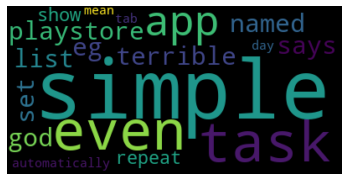

In [104]:
# Test with one review:
text = microsoft_todos.content[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(figsize=(6,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<Figure size 432x288 with 0 Axes>

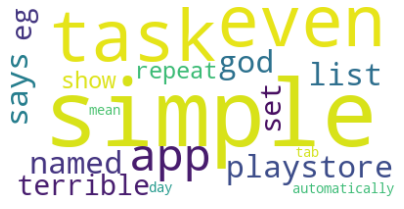

In [105]:
# change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)
plt.figure()
plt.figure(figsize=(7,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# positive reviews = 4+5 stars
# neutral = 3
# neg = 1+2

### Neutral Reviews

In [25]:
microsoft_neutral = microsoft_todos[microsoft_todos['score'] == 3 ].reset_index()

In [50]:
microsoft_neutral.shape

(400, 14)

In [30]:
# Neutral Reviews
neutral_reviews = " ".join(review for review in microsoft_neutral.content)
print ("There are {} words in all neutral reviews.".format(len(neutral_reviews)))

There are 82429 words in all neutral reviews.


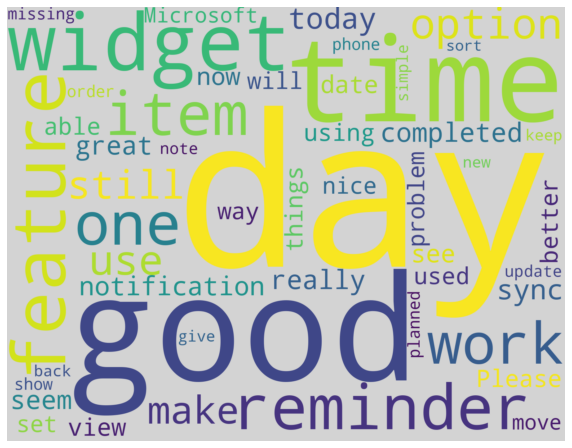

In [101]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['task', 'tasks', 'list', 'app', 'Wunderlist', 'lists', 'add', 'need', 'needs', 'thing'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="lightgrey", max_words=50, width=1800,height=1400).generate(neutral_reviews)

# Cloud
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Positive Reviews

In [54]:
microsoft_positive = microsoft_todos[(microsoft_todos['score'] == 4) | (microsoft_todos['score'] == 5)].reset_index()

In [55]:
microsoft_positive.shape

(400, 14)

In [64]:
# Positive Reviews
pos_reviews = " ".join(review for review in microsoft_positive.content)
print ("There are {} words in all positive reviews.".format(len(pos_reviews)))

There are 76380 words in all positive reviews.


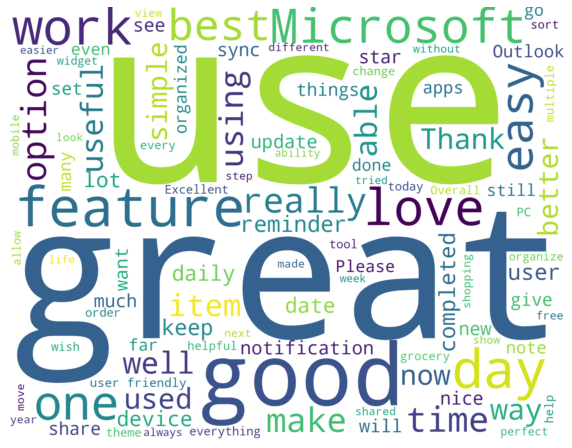

In [106]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['task', 'tasks', 'list', 'app', 'Wunderlist', 'lists', 'add', 'need', 'needs', 'thing'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100, width=1800,height=1400).generate(pos_reviews)

# Cloud
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Negative Reviews

In [60]:
microsoft_negative = microsoft_todos[(microsoft_todos['score'] == 2) | (microsoft_todos['score'] == 1)].reset_index()

In [61]:
microsoft_negative.shape

(400, 14)

In [65]:
# Negative Reviews
neg_reviews = " ".join(review for review in microsoft_negative.content)
print ("There are {} words in all negative reviews.".format(len(neg_reviews)))

There are 82551 words in all negative reviews.


In [ ]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 157.0 / 255.0) #hue= color, now its blue
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

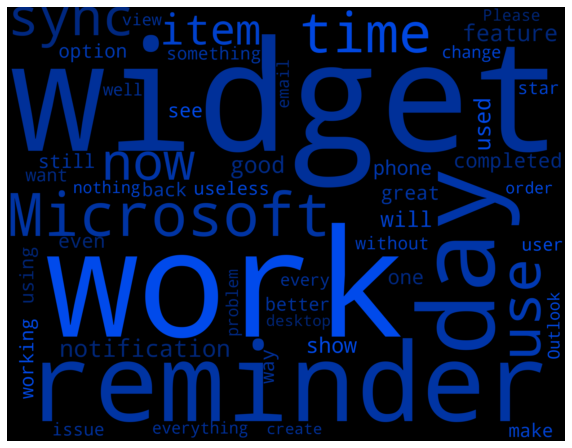

In [103]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(['task', 'tasks', 'list', 'app', 'Wunderlist', 'lists', 'add', 'need', 'needs', 'thing'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black", max_words=50, width=1800,height=1400, color_func=random_color_func).generate(neg_reviews)

# Cloud
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()